In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np

In [26]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
len(X_train)

60000

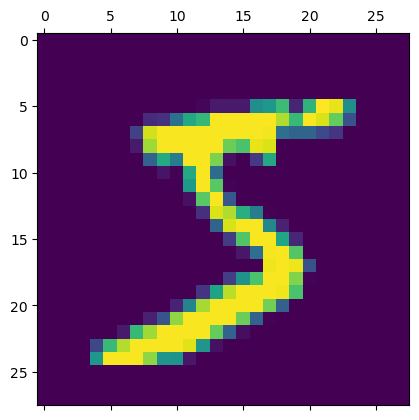

In [29]:
plt.matshow(X_train[0])

In [30]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-05-08 13:15:13.202950: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-05-08 13:15:13.303067: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4651 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3031 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - accuracy: 0.9255


In [32]:
model.evaluate(X_test_flattened, y_test)

 14/313 [>.............................] - ETA: 1s - loss: 0.2359 - accuracy: 0.9353 

2023-05-08 13:15:47.264016: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.9262


[0.2646195888519287, 0.9261999726295471]

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.55166274e-02, 4.34858435e-07, 5.50640076e-02, 9.55663502e-01,
       2.98511307e-03, 8.19427297e-02, 1.50154176e-06, 9.99820650e-01,
       1.06724866e-01, 6.59591675e-01], dtype=float32)

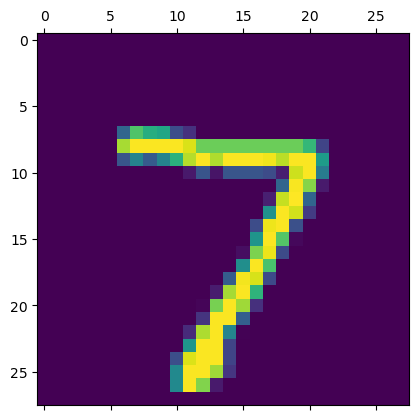

In [34]:
plt.matshow(X_test[0])

In [35]:
np.argmax(y_predicted[0])

7

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [37]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  921,   17,   14,    6,   13,   11,   35,    3],
       [   2,    0,   16,  932,    1,   21,    2,   10,   18,    8],
       [   1,    1,    4,    1,  930,    0,    8,    3,    9,   25],
       [  10,    2,    3,   36,   14,  772,   14,    8,   27,    6],
       [   9,    3,    7,    1,    8,   14,  911,    2,    3,    0],
       [   1,    6,   22,    8,   10,    0,    0,  947,    2,   32],
       [   6,    7,    7,   28,    9,   25,    8,   12,  866,    6],
       [  11,    7,    1,   11,   35,    5,    0,   27,    6,  906]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

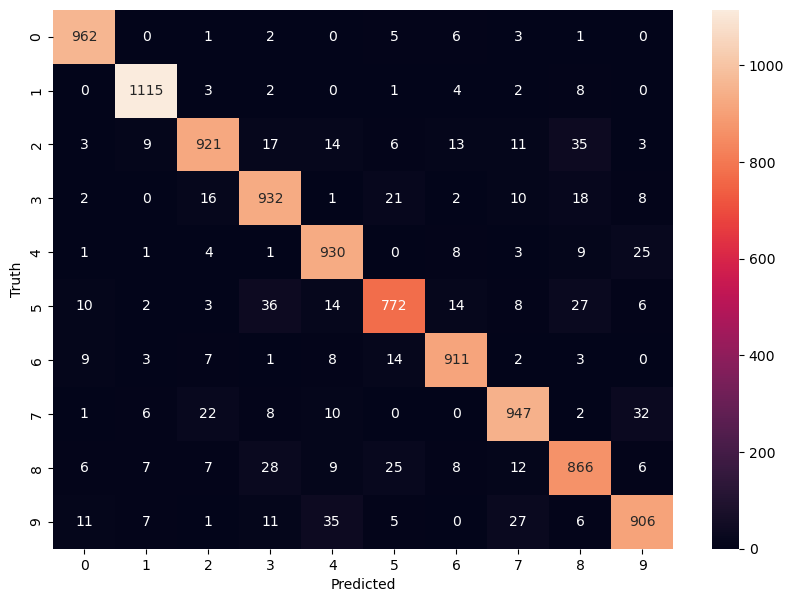

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2626 - accuracy: 0.9262
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1165 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0821 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0614 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0486 - accuracy: 0.9855


In [41]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0818 - accuracy: 0.9748


[0.08179540932178497, 0.9747999906539917]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

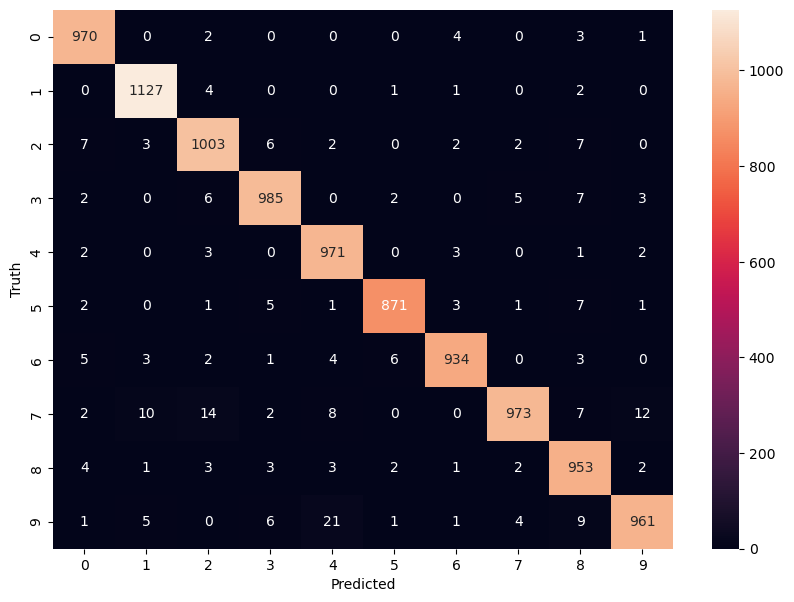

In [42]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2709 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1203 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0839 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0506 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [44]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.0837 - accuracy: 0.9772


[0.08373165875673294, 0.9771999716758728]